In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
import itertools as it

In [2]:
data = pd.read_csv("./data/testset_set_echte_data1.csv", sep=';', on_bad_lines='skip')

In [3]:
data.head()

,BIRTHDAT,BIRTHDATANON,REGDAT,AGEREG,REGMON,REGQRT,REGYR,F01PHYSCOPY,F01PHYS,F01INC01,...,genprof,radioth,rtontv,startdatrt,stopdatrt,gebjaar,panrpre,palabpre,panr,palab
0,24-12-1930,1-1-1925,18-9-2006,71,2010/01,Q3/2020,2013,Dr. Robbert Willems,Dr. Robbert Willems,"tumour<1cm, grade 1",...,1,Onbekend,Tomografie,23-6-1920,11-2-1927,1918,101-123456,68,101-123456,78
1,28-7-1924,1-1-1925,28-5-2015,70,2014/11,Q4/2022,2017,Dr. Robbert Willems,Dr. Sophie Jansen,"tumour<1cm, grade 1",...,1,Onbekend,Tomografie,31-1-1924,29-4-1922,1919,101-123456,98,101-123456,31
2,22-8-1927,1-1-1925,11-8-2013,72,2019/06,Q2/2013,2020,Dr. Pieter de Vries,Dr. Anna Bakker,non-invasive,...,0,Onbekend,Tomografie,9-7-1920,14-11-1929,1930,101-123456,13,101-123456,40
3,21-4-1929,1-1-1925,10-9-2006,71,2012/05,Q4/2020,2020,Dr. Pieter de Vries,Dr. Pieter de Vries,non-invasive,...,1,Onbekend,Tomografie,21-11-1923,1-12-1921,1931,101-123456,27,101-123456,32
4,6-8-1929,1-1-1925,7-7-2013,83,2010/12,Q4/2019,2018,Dr. Anna Bakker,Dr. Robbert Willems,"tumour>2cm, grade 2",...,0,Onbekend,Tomografie,7-11-1921,5-12-1924,1927,101-123456,53,101-123456,84


In [4]:
data['REGDAT'] = pd.to_datetime(data['REGDAT'], dayfirst=True, errors='coerce')
data['BIRTHDAT'] = pd.to_datetime(data['BIRTHDAT'], dayfirst=True, errors='coerce')


data['TIME'] = (data['REGDAT'] - data['BIRTHDAT']).dt.days // 365

In [5]:
data.dtypes

BIRTHDAT        datetime64[ns]
BIRTHDATANON            object
REGDAT          datetime64[ns]
AGEREG                   int64
REGMON                  object
                     ...      
panrpre                 object
palabpre                 int64
panr                    object
palab                    int64
TIME                     int64
Length: 218, dtype: object

In [6]:
data.tail()

,BIRTHDAT,BIRTHDATANON,REGDAT,AGEREG,REGMON,REGQRT,REGYR,F01PHYSCOPY,F01PHYS,F01INC01,...,radioth,rtontv,startdatrt,stopdatrt,gebjaar,panrpre,palabpre,panr,palab,TIME
95,1930-02-23,1-1-1925,2008-11-18,79,2010/12,Q4/2017,2013,Dr. Sophie Jansen,Dr. Robbert Willems,non-invasive,...,Onbekend,Tomografie,12-3-1929,27-1-1926,1923,101-123456,82,101-123456,57,78
96,1920-09-08,1-1-1925,2012-11-20,74,2016/07,Q3/2012,2010,Dr. Anna Bakker,Dr. Robbert Willems,non-invasive,...,Onbekend,Tomografie,24-4-1922,21-2-1925,1921,101-123456,37,101-123456,15,92
97,1930-12-18,1-1-1925,2015-12-04,77,2012/06,Q4/2018,2010,Dr. Sophie Jansen,Dr. Sophie Jansen,multifocal,...,Onbekend,Tomografie,27-1-1928,2-4-1925,1926,101-123456,2,101-123456,42,85
98,1930-10-20,1-1-1925,2012-07-03,76,2015/06,Q4/2015,2015,Dr. Anna Bakker,Dr. Anna Bakker,"tumour>2cm, grade 2",...,Onbekend,Tomografie,5-3-1927,13-2-1930,1933,101-123456,6,101-123456,54,81
99,1927-05-21,1-1-1925,2012-08-03,80,2013/07,Q4/2016,2020,Dr. Sophie Jansen,Dr. Anna Bakker,"tumour>2cm, grade 2",...,Onbekend,Tomografie,24-10-1922,29-10-1929,1916,101-123456,72,101-123456,86,85


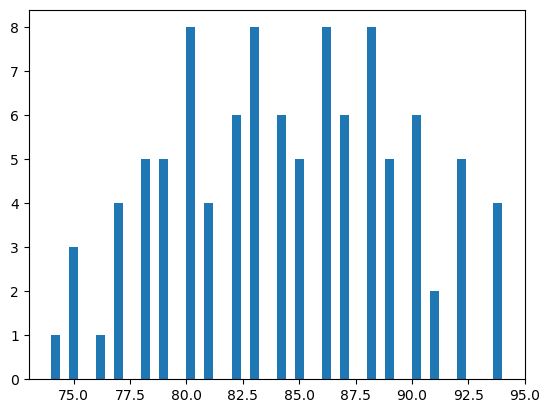

In [7]:

time = "TIME"
event = "F20CRF"
method = "chemo"
method1 = "later"
method2 = "hormonth"
method3 = "neoadjther"
T = data[time]
E = data[event]
plt.hist(T, bins = 50)
plt.show()

<Axes: xlabel='timeline'>

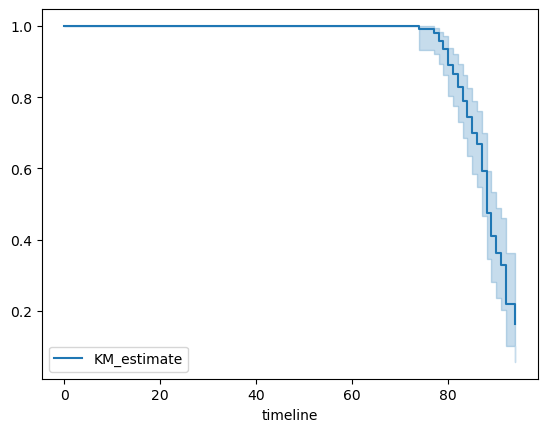

In [8]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

In [9]:
cph = CoxPHFitter()
columns = [time, event, method, method1, method2, method3]
cph.fit(data[columns], duration_col = time, event_col = event)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 100 total observations, 54 right-censored observations>
             duration col = 'TIME'
                event col = 'F20CRF'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 46
   partial log-likelihood = -167.71
         time fit was run = 2025-05-20 13:17:48 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
chemo        0.08       1.08       0.30            -0.52             0.67                 0.60                 1.96
later       -0.19       0.83       0.30            -0.78             0.40                 0.46                 1.49
hormonth     0.05       1.05       0.30            -0.53             0.63                 0.59                 1.89
neoadjther  -0.14       0.87       0.30            -0.73             0.46                 0.48                 1.58

             cmp to     z    p   -log2(p)
covariate                                
chemo          0.00  0.26 0.79       0.33
later          0.00 -0.62 0.53       0.91
hormonth       0.00  0.17 0.86       0.21
neoadjther     0.00 -0.45 0.65       0.62
---
Concordance = 0.53
Partial AIC = 343.42
log-likelihood ratio test = 0.74 on 4 df
-log2(p) of ll-ratio test = 0.08

<Axes: xlabel='log(HR) (95% CI)'>

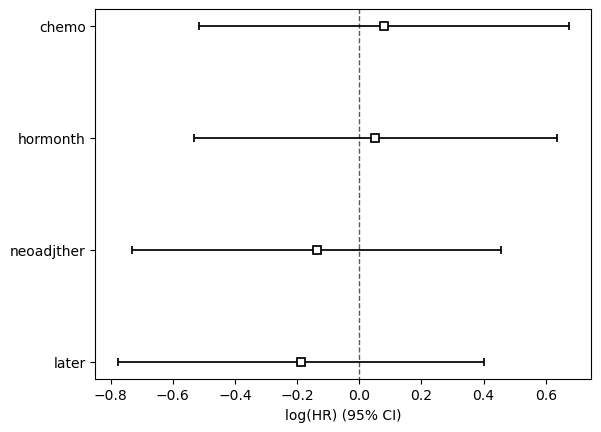

In [10]:
cph.plot()

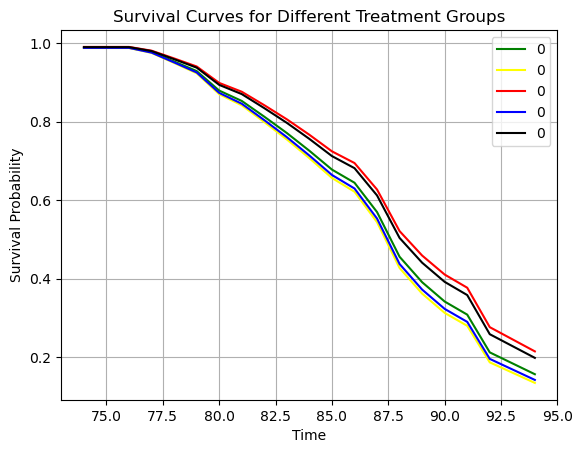

In [100]:
group_1 = pd.DataFrame({ method : [0], method1 : [0], method2: [0], method3: [0]})
group_2 = pd.DataFrame({ method : [1], method1 : [0], method2: [0], method3: [0]})
group_3 = pd.DataFrame({ method : [0], method1 : [1], method2: [0], method3: [0]})
group_4 = pd.DataFrame({ method : [0], method1 : [0], method2: [1], method3: [0]})
group_5 = pd.DataFrame({ method : [0], method1 : [0], method2: [0], method3: [1]})

ax = cph.predict_survival_function(group_1).plot(label="Chemo=0, Later=0, hormonth=0, neoadjther=0", linestyle='-', color="green")
cph.predict_survival_function(group_2).plot(ax=ax, label="Chemo=1, Later=0, hormonth=0, neoadjther=0", linestyle='-', color="yellow")
cph.predict_survival_function(group_3).plot(ax=ax, label="Chemo=0, Later=1, hormonth=0, neoadjther=0", linestyle='-', color="red")
cph.predict_survival_function(group_4).plot(ax=ax, label="Chemo=0, Later=0, hormonth=1, neoadjther=0", linestyle='-', color="blue")
cph.predict_survival_function(group_5).plot(ax=ax, label="Chemo=0, Later=0, hormonth=0, neoadjther=1", linestyle='-', color="black")


# Finalize plot
plt.title("Survival Curves for Different Treatment Groups")
plt.xlabel("Time")

plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend()
plt.show()